In [51]:
# The Dataset- long-term care claims data.


In [ ]:
# import relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date as dt
from scipy.stats import ttest_ind
import scipy.stats as stats
import missingno as msno
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [52]:
# read the file
df = pd.read_csv('datasets/claims_data.csv')


In [53]:
#make sure it was loaded correctly
df.shape # (1170, 12)
df.head()

,hashed_ph_id,hashed_claim_id,claim_start_date,claim_end_date,birth_date,GENDER,filing_state,claim_status,eb_status,eb_reassessment_date,primary_diagnosis,last_care_setting
0,1134,1362,30/12/2017,NaN,24/10/1929,M,MN,Denied,Denied,NaN,"Chronic kidney disease, unspecified",NaN
1,1255,1918,20/12/2016,24/12/2017,21/03/1933,F,FL,Approved Closed,Closed,NaN,Unspecified dementia,NH
2,1550,1286,24/07/2015,22/04/2017,02/08/1938,F,MO,Approved Closed,Closed,NaN,Unspecified dementia without behavioral distur...,NH
3,1984,1008,22/05/2016,22/06/2017,29/07/1924,M,MS,Approved Closed,Closed,NaN,"Sepsis, unspecified organism",HHC
4,1084,1674,24/05/2013,24/09/2018,26/02/1927,F,IA,Approved Closed,Closed,NaN,Muscle weakness (generalized),NH


In [54]:
#descriptive statistics for the dataframe

df.describe(include="all")

,hashed_ph_id,hashed_claim_id,claim_start_date,claim_end_date,birth_date,GENDER,filing_state,claim_status,eb_status,eb_reassessment_date,primary_diagnosis,last_care_setting
count,1170.000000,1170.000000,1170,944,1170,1170,1170,1170,1170,151,1162,842
unique,NaN,NaN,983,812,935,2,48,5,5,124,309,6
top,NaN,NaN,23/02/2018,24/07/2020,11/08/1932,F,FL,Approved Closed,Closed,01/01/2022,Unspecified dementia without behavioral distur...,NH
freq,NaN,NaN,5,7,6,731,115,769,712,3,112,538
mean,1501.582051,1584.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,287.496016,337.894214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1255.250000,1292.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1504.500000,1584.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1755.750000,1876.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#view the dataframe columns

list(df.columns)

['hashed_ph_id',
 'hashed_claim_id',
 'claim_start_date',
 'claim_end_date',
 'birth_date',
 'GENDER',
 'filing_state',
 'claim_status',
 'eb_status',
 'eb_reassessment_date',
 'primary_diagnosis',
 'last_care_setting']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hashed_ph_id          1170 non-null   int64 
 1   hashed_claim_id       1170 non-null   int64 
 2   claim_start_date      1170 non-null   object
 3   claim_end_date        944 non-null    object
 4   birth_date            1170 non-null   object
 5   GENDER                1170 non-null   object
 6   filing_state          1170 non-null   object
 7   claim_status          1170 non-null   object
 8   eb_status             1170 non-null   object
 9   eb_reassessment_date  151 non-null    object
 10  primary_diagnosis     1162 non-null   object
 11  last_care_setting     842 non-null    object
dtypes: int64(2), object(10)
memory usage: 109.8+ KB


In [ ]:
# Investigating the missing data, specifically claim_end_date and eb_reassessment_date  

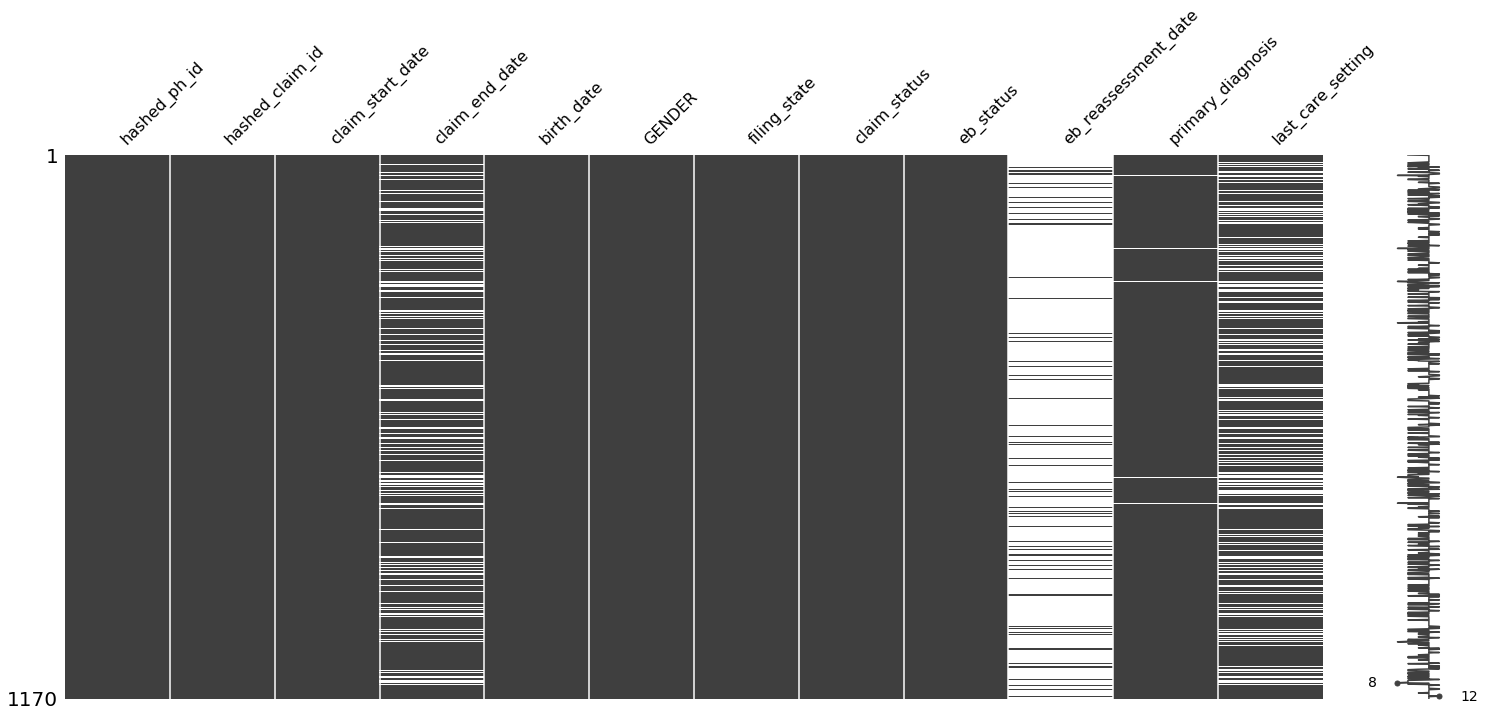

In [57]:
# visualize missing data
msno.matrix(df) #white represent missing values,
#we can see whether the missing values correspond with other missing values
plt.show()

<AxesSubplot:>

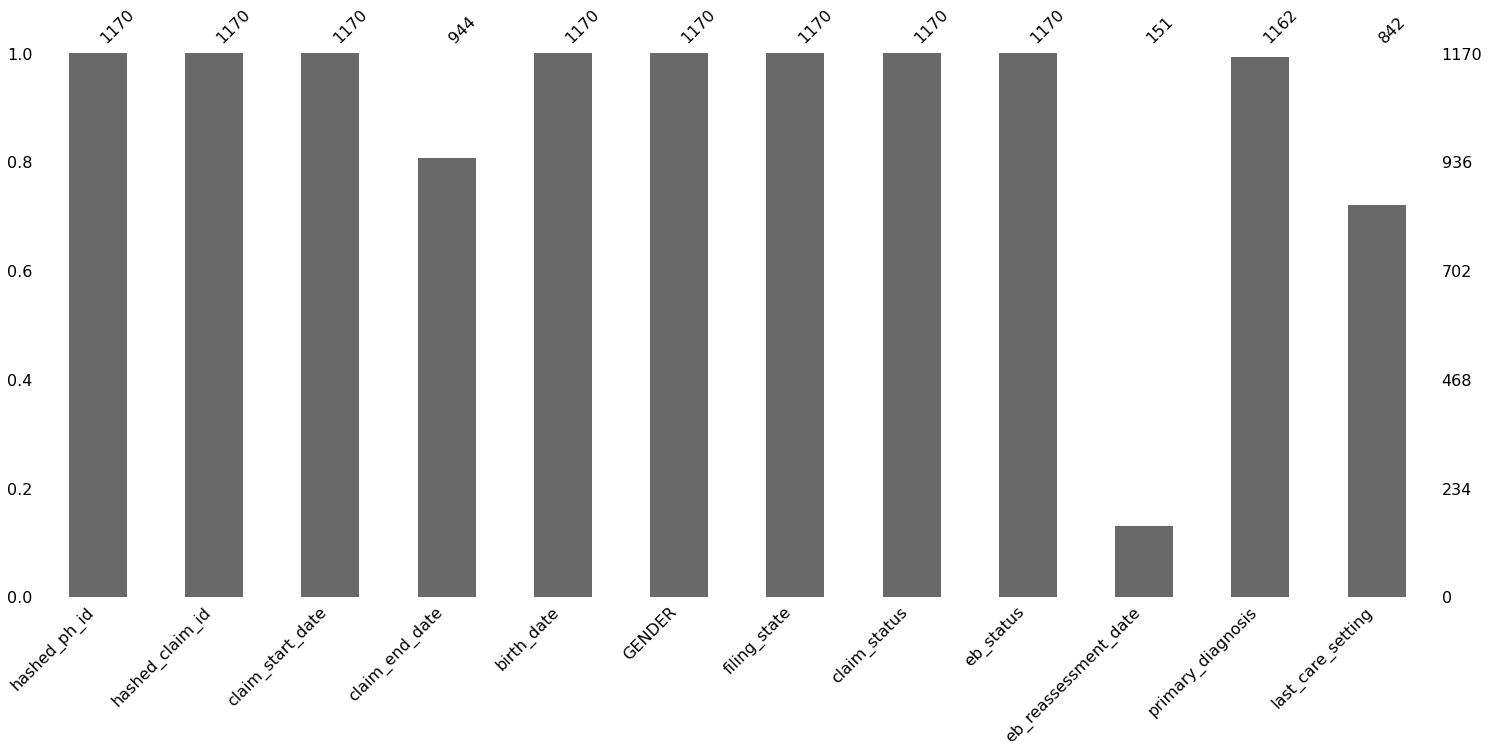

In [58]:
# visualize missing data

msno.bar(df) #hight of the bar represent non-null values

In [59]:
# summary of missing values across all columns.only four columns have missing data
df.isna().sum()

hashed_ph_id               0
hashed_claim_id            0
claim_start_date           0
claim_end_date           226
birth_date                 0
GENDER                     0
filing_state               0
claim_status               0
eb_status                  0
eb_reassessment_date    1019
primary_diagnosis          8
last_care_setting        328
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


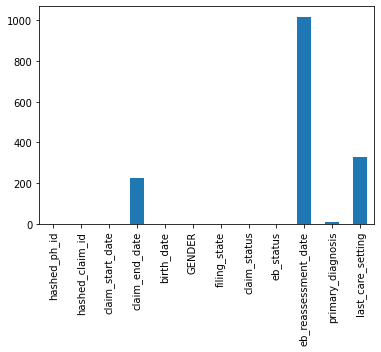

In [60]:
# a different way to visualize missing data
missing=df.isna().sum() # summary of missing values across all columns. eb_reassessment_date
# have the highest missing values
print(missing.plot(kind='bar'))

In [61]:
#investigate missing claim_end_date 
# subset for cases with missing claim_end and non missing claim_end
missing_claim_end = df[df['claim_end_date'].isna()]
complete_claim = df[~df['claim_end_date'].isna()]

print(missing_claim_end.hashed_claim_id.count()) # 226 cases
print(complete_claim.hashed_claim_id.count()) # 944 cases

226
944


In [62]:
# create pivot table to investigate missing values for claim_end_date 
pd.pivot_table(missing_claim_end,'hashed_claim_id','claim_status',aggfunc=pd.Series.nunique)

,hashed_claim_id
claim_status,
Denied,199
NEW,9
Withdrawn,18


In [63]:
# create pivot table to investigate non-missing values for claim_end_date 

pd.pivot_table(complete_claim,'hashed_claim_id','claim_status',aggfunc=pd.Series.nunique)

,hashed_claim_id
claim_status,
Approved Closed,769
Approved-Reassessment,175


In [64]:
#investigate missing eb_reassessment_date
# subset for cases with missing eb_reassessment_date and non missing eb_reassessment_date
missing_eb_end = df[df['eb_reassessment_date'].isna()] 
complete_eb = df[~df['eb_reassessment_date'].isna()]
missing_eb=missing_eb_end.groupby('claim_status').agg('nunique')
missing_eb_end.shape # 1019 cases
complete_eb.shape # 151 cases

(151, 12)

In [65]:
# create pivot table to investigate missing values for eb_reassessment_date
pd.pivot_table(missing_eb_end,'hashed_claim_id','claim_status',aggfunc=pd.Series.nunique)


,hashed_claim_id
claim_status,
Approved Closed,769
Approved-Reassessment,25
Denied,199
NEW,9
Withdrawn,17


In [66]:
pd.pivot_table(missing_eb_end,'hashed_claim_id','eb_status',aggfunc=pd.Series.nunique)


,hashed_claim_id
eb_status,
Approved,21
Closed,711
Deceased,70
Denied,203
In Assessment,14


In [67]:
pd.pivot_table(missing_eb_end,'hashed_claim_id','filing_state',aggfunc=pd.Series.nunique)


,hashed_claim_id
filing_state,
AL,4
AR,5
AZ,12
CA,36
CO,13
CT,30
DC,3
DE,2
FL,103


In [68]:
pd.pivot_table(missing_eb_end,'hashed_claim_id','last_care_setting',aggfunc=pd.Series.nunique)



,hashed_claim_id
last_care_setting,
Alt Housing,21
HHC,193
Ind Prov,6
NH,472
Other,9
Personal Care,12


In [69]:
pd.pivot_table(missing_eb_end,'hashed_claim_id','primary_diagnosis',aggfunc=pd.Series.nunique)


,hashed_claim_id
primary_diagnosis,
"ACUTE, BUT ILL-DEFINED, CEREBROVASCULAR DISEASE",1
ALZHEIMER'S DISEASE,29
ANTERIOR HORN CELL DISEASE,1
ASTHMA,1
Acute embolism and thombos unsp deep vn unsp lower extremity,1
...,...
VIRAL INFECTION IN CONDITIONS CLASSIFIED ELSEWHERE AND OF,1
Vascular dementia,1
Vascular dementia with behavioral disturbance,6


In [70]:
pd.pivot_table(complete_eb,'hashed_claim_id','claim_status',aggfunc=pd.Series.nunique)


,hashed_claim_id
claim_status,
Approved-Reassessment,150
Withdrawn,1


In [71]:
pd.pivot_table(complete_eb,'hashed_claim_id','eb_status',aggfunc=pd.Series.nunique)


,hashed_claim_id
eb_status,
Approved,140
Closed,1
In Assessment,10


In [ ]:
#After reviewing the data I can infer that the missing values for claim_end_date are those where the claim_status was denied,
#new or withdrawn.that means that claims that where denied don't have claim_end_date.
#new claims won't have end date as they are still looked at. and withdrawn cases won't have claim end date. 
# The missing values are of type Missing not at random (MNAR)-
#(i.e., the value of the variable that's missing is related to the reason it's missing).
# Non-missing values for eb_reassessment_date- those with status Approved-Reassessment and 1 withdrawn.
# On the other hand, missing values occur in all the claim status categories.
#I tried to look for a trend whether the missing data occurs for specific claim status,
#gender filling state, last care setting, primary diagnosis, eb status
# but couldn't find a trend. that means that the missing data is of type missing completely at random (MCAR).  


In [ ]:
# Next, I want to investigate the distribution of claimants age upon first approved claim.

In [72]:
# sort the data by claim start date
data_sorted=df.sort_values(by='claim_start_date')
#subset status for approved claims
approved_closed= data_sorted['claim_status']=="Approved Closed"
print(approved_closed.shape) # 769 number of approved cases
#leave only the first claim that was approved,659 cases
first_approved=df[approved_closed].drop_duplicates(subset=['hashed_ph_id'],keep='first')
# calculate patients age: transform to datetime type
birth_date = pd.to_datetime(first_approved['birth_date'])
claim_start_date= pd.to_datetime(first_approved['claim_start_date']) 
# calculate the age by subtracting the dates
age_manual= (claim_start_date-birth_date).dt.days/365
#add an age column  to the df
first_approved['age']=age_manual
#make sure the age calculation worked
print(age_manual.head()) 
print(first_approved.hashed_claim_id.count()) #659 cases


(1170,)
1    83.808219
2    77.506849
3    91.876712
4    86.298630
5    94.095890
dtype: float64
659


C:\Users\Maayan\AppData\Local\Temp\ipykernel_3196\3739206694.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_approved=df[approved_closed].drop_duplicates(subset=['hashed_ph_id'],keep='first')


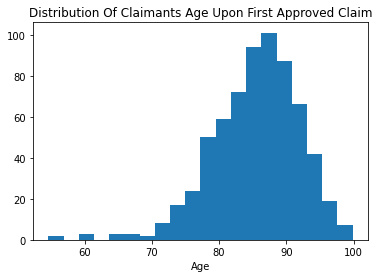

Age median of first time approved claimants=86.06849315068493
Age IQR of first time approved claimants=8.220547945205482


In [73]:
 # create a histogram of claimnts age upon first approved claim
plt.hist(first_approved['age'],bins=20)
plt.xlabel('Age')
plt.title('Distribution Of Claimants Age Upon First Approved Claim')
plt.show()
print("Age median of first time approved claimants="+str(first_approved["age"].median()))
print("Age IQR of first time approved claimants="+str(first_approved["age"].quantile(0.75)-first_approved["age"].quantile(0.25)))


In [ ]:
# There is apeak of approving first claims at around age 85. Claims before age 75 are rarely approved. There are less approved first claims after the age of 90. 

In [ ]:
# Another interesting question is whether there is a difference between males and females in the prevalence of
#claimants who were ever denied a claim? Is this difference statistically significant?


Text(0.5, 1.0, 'Count Of Claimants Gender Upon First Approved Claim')

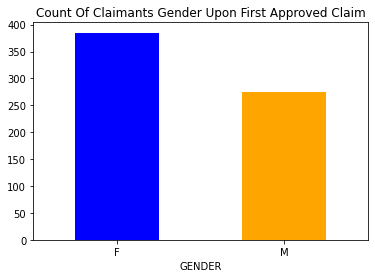

In [74]:
# create a graph of claimants gender upon first approved claim
c=['blue','orange'] #colors for color blind people
first_approved.groupby('GENDER').size().plot(kind='bar',color=c) # create a bar graph with different colors per gender 
plt.xticks(rotation=360)
plt.title('Count Of Claimants Gender Upon First Approved Claim')





Text(0.5, 1.0, 'Count Of Claimants Gender Upon First Claim')

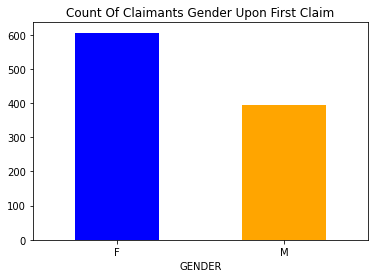

In [75]:
# create a graph of claimants gender upon first claim
data_sorted=df.sort_values(by='claim_start_date')
first_claims=data_sorted.drop_duplicates(subset=['hashed_ph_id'],keep='first')

c=['blue','orange']
first_claims.groupby('GENDER').size().plot(kind='bar',color=c) # create a bar graph with different colors per gender 
plt.xticks(rotation=360)
plt.title('Count Of Claimants Gender Upon First Claim')

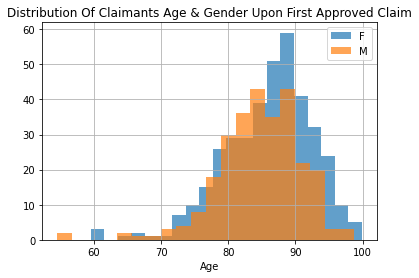

In [76]:
# Distribution Of Claimants Age & Gender Upon First Approved Claim
first_approved[first_approved["GENDER"]=="F"]['age'].hist(alpha=0.7,bins=20)
first_approved[first_approved["GENDER"]=="M"]['age'].hist(alpha=0.7,bins=20)
plt.legend(["F", "M"])
plt.xlabel('Age')
plt.title('Distribution Of Claimants Age & Gender Upon First Approved Claim')
plt.show()

In [ ]:
# Males and females distribution of approved claims by age seems fairly similar.
# There are less cases of approved claims for men over the age of 90 but this might be due to less claims filed. 

199


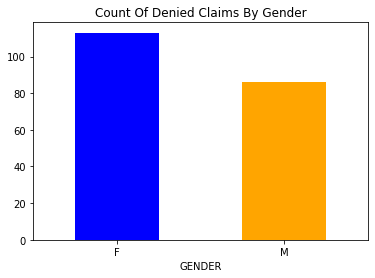

In [77]:
#subset status for denied claims
denied_status= df['claim_status']=="Denied"
denied=df[denied_status]
# create a bar graph with different colors per gender 
c=['blue','orange']
denied.groupby('GENDER').size().plot(kind='bar',color=c) 
plt.xticks(rotation=360)
plt.title('Count Of Denied Claims By Gender')
print(denied.hashed_claim_id.count()) #199 denied cases



In [ ]:
# There are less denied claims for males vs females, but this graph is misleading as we need to look at the proportion of denied/approved by gender.

In [78]:
approved_denied=df.query('claim_status=="Approved Closed" or claim_status=="Denied"')
print(approved_denied.head())
approved_denied.shape # 968 cases of approved and denied claims


   hashed_ph_id  hashed_claim_id claim_start_date claim_end_date  birth_date  \
0          1134             1362       30/12/2017            NaN  24/10/1929   
1          1255             1918       20/12/2016     24/12/2017  21/03/1933   
2          1550             1286       24/07/2015     22/04/2017  02/08/1938   
3          1984             1008       22/05/2016     22/06/2017  29/07/1924   
4          1084             1674       24/05/2013     24/09/2018  26/02/1927   

  GENDER filing_state     claim_status eb_status eb_reassessment_date  \
0      M           MN           Denied    Denied                  NaN   
1      F           FL  Approved Closed    Closed                  NaN   
2      F           MO  Approved Closed    Closed                  NaN   
3      M           MS  Approved Closed    Closed                  NaN   
4      F           IA  Approved Closed    Closed                  NaN   

                                   primary_diagnosis last_care_setting  
0      

(968, 12)

In [79]:
 #subset status for approved claims
approved_status= df['claim_status']=="Approved Closed"
approved=df[approved_status]
print(approved.hashed_claim_id.count()) #(769, Approved closed cases)

769


In [80]:
#subset for denied claims per gender
female_denied = denied[denied['GENDER']=='F']
male_denied = denied[denied['GENDER']=='M']
print(female_denied.hashed_claim_id.count()) #(113 denied female)
print(male_denied.hashed_claim_id.count()) #(86 denied male)

113
86


In [81]:
#subset for approved cases by gender
female_approved = approved[approved['GENDER']=='F']
male_approved = approved[approved['GENDER']=='M']
print(female_approved.hashed_claim_id.count()) #(467 approved female)
print(male_approved.hashed_claim_id.count()) #(302 approved male)

467
302


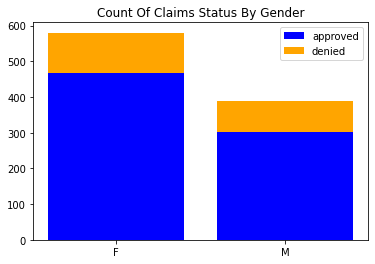

In [82]:
# create a graph for count of claims status by gender. the graph before was misleading
# because we need to look at the proportion of denied/approved by gender and not just the
# absoulte number of denied cases
x=['F','M']
y1=[len(female_approved),len(male_approved)]
y2=[len(female_denied),len(male_denied)]
plt.bar(x,y1,color='b',label='approved')
plt.bar(x,y2,bottom=y1,color='orange',label='denied')
plt.legend()
plt.title('Count Of Claims Status By Gender')

plt.show()


In [ ]:
# When looking at the proportion of denied/approved in males and females we can see that the difference is not significant. 

In [83]:
# testing the statistical significance by performing a Ztest-proportion 
significance = 0.025
# our samples - 19% were denied in females, and 22% were denied in males
sample_denied_F, sample_size_F = (113, 580)
sample_denied_M, sample_size_M = (86, 388)
# check our sample against Ho 
successes = np.array([sample_denied_F, sample_denied_M])
samples = np.array([sample_size_F, sample_size_M])
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report the result
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - There is no significant difference in denying claims between genders")
else:
   print ("Reject the null hypothesis - There is significant difference in denying claims between genders")

z_stat: -1.012, p_value: 0.312
Fail to reject the null hypothesis - There is no significant difference in denying claims between genders
